In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('../150615/15P0180_21-Aug-16-Series.csv')
df['Time'] = pd.to_datetime(df['Day']+' '+df['Time'])
df = df.set_index('Time')
df.head()

,DeployID,Ptt,DepthSensor,Source,Instr,Day,LocationQuality,Latitude,Longitude,Depth,DRange,Temperature,TRange
Time,,,,,,,,,,,,,
2015-10-06 11:20:00,150615,150615,0.5,Transmission,MiniPAT,06-Oct-2015,NaN,NaN,NaN,228.5,2.25,6.0,0.1
2015-10-06 11:30:00,150615,150615,0.5,Transmission,MiniPAT,06-Oct-2015,NaN,NaN,NaN,228.0,2.25,6.0,0.1
2015-10-06 11:40:00,150615,150615,0.5,Transmission,MiniPAT,06-Oct-2015,NaN,NaN,NaN,229.5,2.25,6.0,0.1
2015-10-06 11:50:00,150615,150615,0.5,Transmission,MiniPAT,06-Oct-2015,NaN,NaN,NaN,229.0,2.25,6.0,0.1
2015-10-06 12:00:00,150615,150615,0.5,Transmission,MiniPAT,06-Oct-2015,NaN,NaN,NaN,229.5,2.25,6.0,0.1


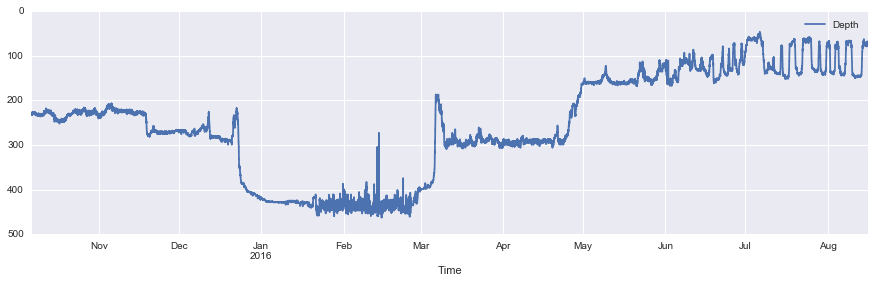

In [5]:
df.plot(y='Depth', figsize=(15,4)).invert_yaxis()

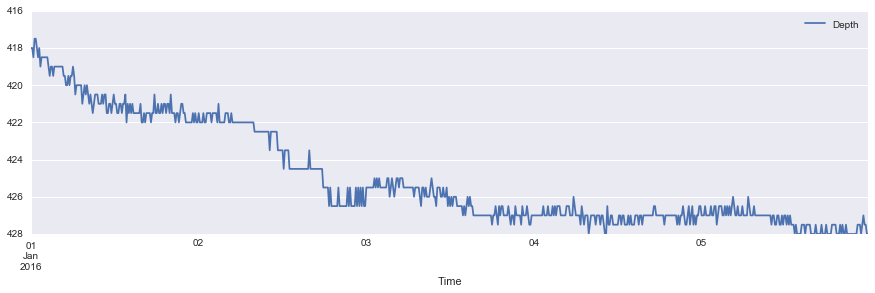

In [6]:
df['2016-1-1':'2016-1-5'].plot(y='Depth', figsize=(15,4)).invert_yaxis()

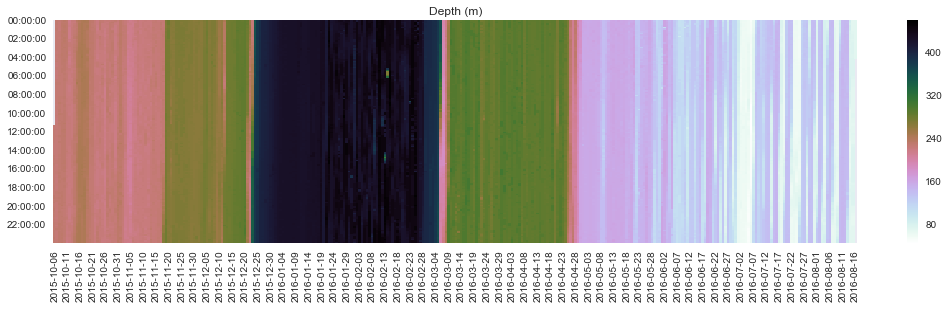

In [11]:
groups = df['Depth'].dropna().groupby(pd.TimeGrouper('D'))
days = pd.DataFrame()
for name, group in groups:
    ts = pd.DataFrame({str(name.date()):group.values}, index=[val.time() for val in group.index])
    ts = ts.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
    days = pd.concat([days, ts], axis=1)
plt.figure(figsize=(18, 4))
ax = sns.heatmap(days, cmap='cubehelix_r', xticklabels=5, yticklabels=12)
plt.title('Depth (m)')

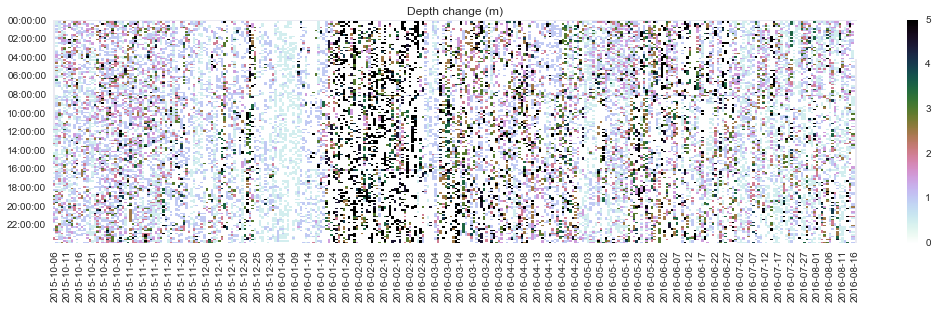

In [12]:
daysc = abs(days.diff())
plt.figure(figsize=(18, 4))
sns.heatmap(daysc, cmap='cubehelix_r', xticklabels=5, yticklabels=12,vmax=5)
plt.title('Depth change (m)')

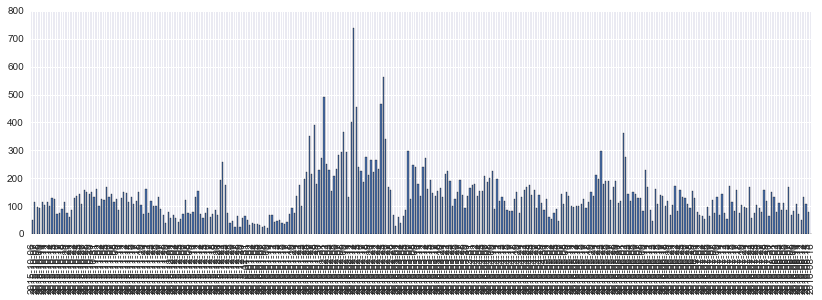

In [9]:
depth_change_sum = np.sum(daysc, axis=0)
depth_change_sum.plot(kind='bar', figsize=(14,4))

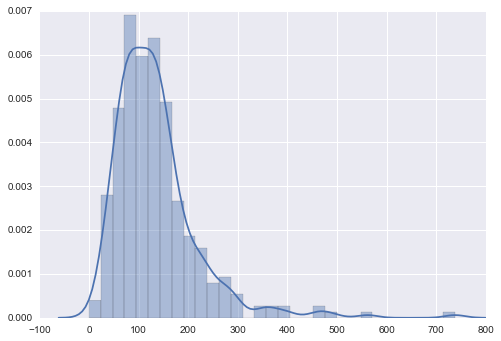

In [10]:
sns.distplot(depth_change_sum.dropna())